In [110]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join

#FOR debugging
import time
import matplotlib.pyplot as plt

In [111]:
def read(path):
    start=time.time()

    path_files = [f for f in listdir(path)]
    num_files=len(path_files)
    img_arrays= [None] * num_files
    for i in range(num_files):
        files = [f for f in listdir(path+"/"+path_files[i]) if isfile(join(path+"/"+path_files[i], f))]
        num_frames=len(files)
        frames_arrays= [None] * num_frames
        for j in range(num_frames):
            frames_arrays[j]=np.load(path+"/"+path_files[i]+"/"+files[j])
        img_arrays[i]=frames_arrays

    print("Elapsed time = ", time.time()-start)
    return img_arrays

In [112]:
def process_frame(frame,debug):
    #NOT IMPLEMENTED YET
    return frame


In [113]:
def process_video(video,debug):
    processed_frames=[None]*len(video)
    for i in range(len(video)):
        if (debug and (i+1)%100==0):
            print(" -> Processing frame ",i+1," of ",len(video))
        processed_frames[i]=process_frame(video[i],debug)
    return processed_frames

In [18]:
def processdir(path, debug=False):
    video_arrays = read(path)
    if(debug):
        print("Number of read videos: "+str(len(video_arrays)))
    processed_videos = [None] * len(video_arrays)
    for i in range(len(video_arrays)):
        if (debug):
            print("Processing video ",i+1," of ",len(video_arrays))
        processed_videos[i]=process_video(video_arrays[i],debug)
    print("DONE!")

In [85]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [86]:
gaussian = (1 / 1003.0) * np.array([[0., 0., 1., 2., 1., 0., 0.],
                                  [0., 3., 13., 22., 13., 3., 0.],
                                  [1., 13., 59., 97., 59., 13., 1.],
                                  [2., 22., 97., 159., 97., 22., 2.],
                                  [1., 13., 59., 97., 59., 13., 1.],
                                  [0., 3., 13., 22., 13., 3., 0.],
                                  [0., 0., 1., 2., 1., 0., 0.]])

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [114]:
path = '../CARDIO_videos'
frames = read(path)


Elapsed time =  0.13972234725952148


# Adaptive binarization and CLAHE


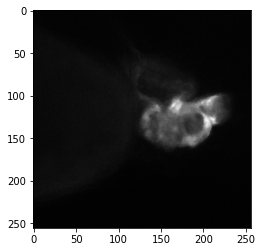

In [134]:
img = frames[0][10]
plt.imshow(img,cmap='gray')

In [119]:
im_gau = convolve2d(img, gaussian, 'same', boundary = 'symm')
#ns perque despres no puc fer el clahe

In [136]:
clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
cl_img = clahe.apply(img)

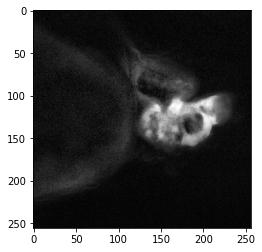

In [137]:
plt.imshow(cl_img, cmap='gray')

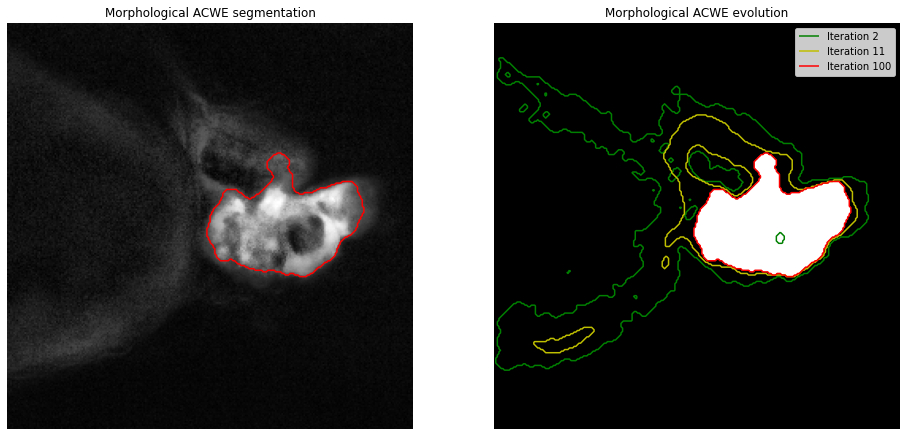

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)


def store_evolution_in(lst):
    """Returns a callback function to store the evolution of the level sets in
    the given list.
    """

    def _store(x):
        lst.append(np.copy(x))

    return _store


# Morphological ACWE
image = cl_img

# Initial level set
init_ls = checkerboard_level_set(image.shape, 6)
# List with intermediate results for plotting the evolution
evolution = []
callback = store_evolution_in(evolution)
ls = morphological_chan_vese(image, 100, init_level_set=init_ls, smoothing=3,
                             iter_callback=callback)

fig, axes = plt.subplots(1, 2, figsize=(16, 16))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].contour(ls, [0.5], colors='r')
ax[0].set_title("Morphological ACWE segmentation", fontsize=12)

ax[1].imshow(ls, cmap="gray")
ax[1].set_axis_off()
contour = ax[1].contour(evolution[2], [0.5], colors='g')
contour.collections[0].set_label("Iteration 2")
contour = ax[1].contour(evolution[20], [0.5], colors='y')
contour.collections[0].set_label("Iteration 11")
contour = ax[1].contour(evolution[-1], [0.5], colors='r')
contour.collections[0].set_label("Iteration 100")
ax[1].legend(loc="upper right")
title = "Morphological ACWE evolution"
ax[1].set_title(title, fontsize=12)

plt.show()

In [126]:
ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

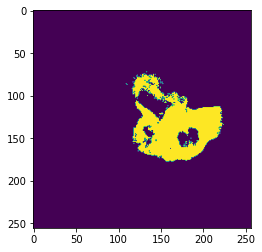

In [127]:
plt.imshow(thresh3)

# Voronoi-based Segmentation

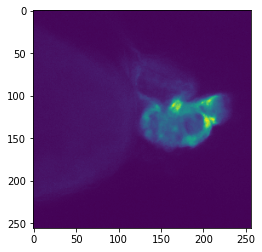

In [139]:
plt.imshow(img)

In [140]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(img)

QhullError: QH6214 qhull input error: not enough points(256) to construct initial simplex (need 258)

While executing:  | qhull v Qc Qbb Qx Qz
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1196878973  voronoi  Qcoplanar-keep  Qbbound-last  Qxact-merge
  Qz-infinity-point  _zero-centrum  Qinterior-keep
  Q3-no-merge-vertices-dim-high  _maxoutside  0
